Raw score of all test for each examinees
[[ 71  64  83 100  71]
 [ 34  48  67  57  68]
 [ 58  59  78  87  66]
 [ 41  51  70  60  72]
 [ 69  56  74  81  66]
 [ 64  65  82 100  71]
 [ 16  45  63   7  59]
 [ 59  59  78  59  62]
 [ 57  54  84  73  72]
 [ 46  54  71  43  62]
 [ 23  49  64  33  70]
 [ 39  48  71  29  66]
 [ 46  55  68  42  61]
 [ 52  56  82  67  60]
 [ 39  53  78  52  72]
 [ 23  43  63  35  59]
 [ 37  45  67  39  70]
 [ 52  51  74  65  69]
 [ 63  56  79  91  70]
 [ 39  49  73  64  60]]


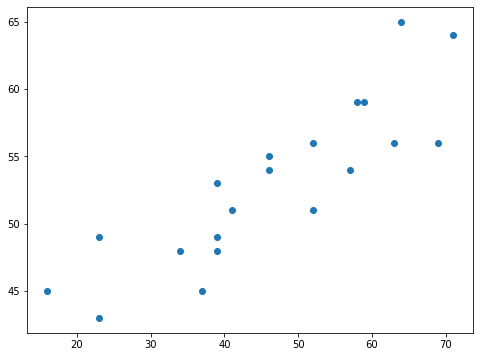

Average for each subject
[46.4  53.   73.45 59.2  66.3 ]
Principal component load for each subject
[[0.49 0.17 0.2  0.83 0.07]]
Variance of raw scores for each subject
[231.24  34.4   44.35 591.46  22.21]
Principal component value for each examinees(principal component score)
[[149.94]
 [ 90.05]
 [130.6 ]
 [ 97.36]
 [129.74]
 [146.48]
 [ 37.88]
 [107.63]
 [119.24]
 [ 85.76]
 [ 64.5 ]
 [ 69.97]
 [ 84.45]
 [110.94]
 [ 91.66]
 [ 64.16]
 [ 76.24]
 [107.48]
 [136.32]
 [ 99.09]]
Examinee number, raw score for each examinee, principal component score, total score
0 [ 71  64  83 100  71] [149.94] 389
1 [34 48 67 57 68] [90.05] 274
2 [58 59 78 87 66] [130.6] 348
3 [41 51 70 60 72] [97.36] 294
4 [69 56 74 81 66] [129.74] 346
5 [ 64  65  82 100  71] [146.48] 382
6 [16 45 63  7 59] [37.88] 190
7 [59 59 78 59 62] [107.63] 317
8 [57 54 84 73 72] [119.24] 340
9 [46 54 71 43 62] [85.76] 276
10 [23 49 64 33 70] [64.5] 239
11 [39 48 71 29 66] [69.97] 253
12 [46 55 68 42 61] [84.45] 272
13 [52 56 82 67 6

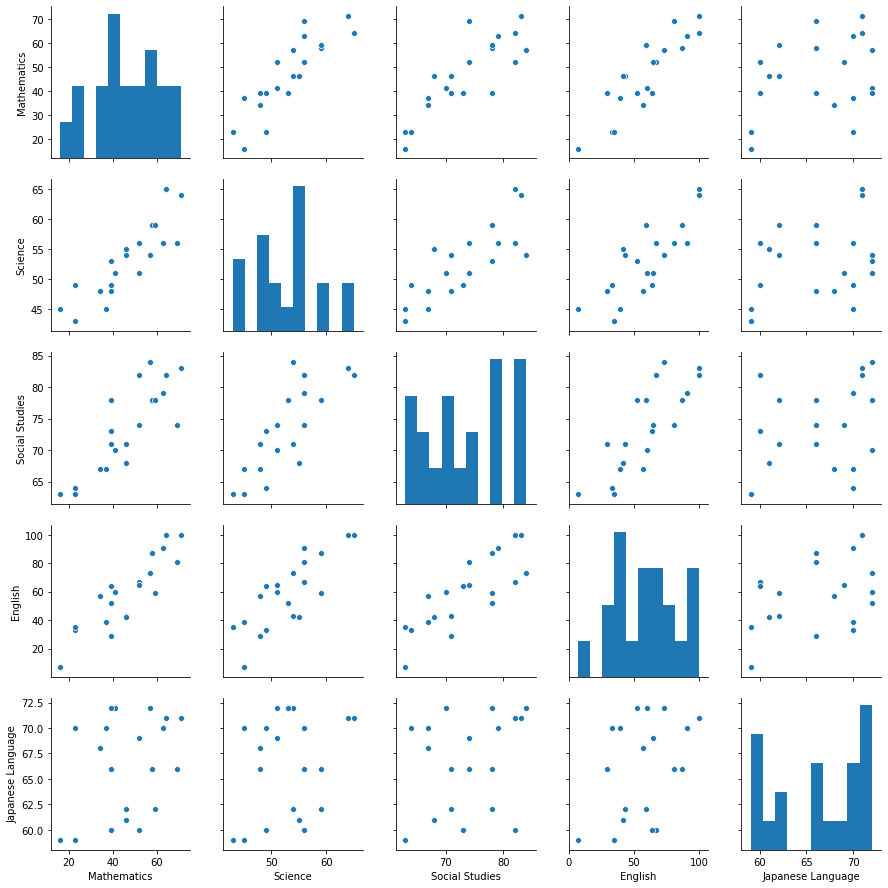

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
plt.figure(figsize = (8, 6)) # Preparation for display

# Each column is in the order of mathematics, science, society, English, Japanese
all_test_data=np.array([[71,64,83,100,71],[34,48,67,57,68],[58,59,78,87,66],[41,51,70,60,72],[69,56,74,81,66],[64,65,82,100,71],[16,45,63,7,59],[59,59,78,59,62],[57,54,84,73,72],[46,54,71,43,62],[23,49,64,33,70],[39,48,71,29,66],[46,55,68,42,61],[52,56,82,67,60],[39,53,78,52,72],[23,43,63,35,59],[37,45,67,39,70],[52,51,74,65,69],[63,56,79,91,70],[39,49,73,64,60]])
np.set_printoptions(precision=2) # Number of decimal places
number_of_examinees=all_test_data.shape[0] # The number of rows in all test data is the number of examinees

print("Raw score of all test for each examinees")
print(all_test_data)

# Scatterplot with mathematics and science
plt.scatter(all_test_data[:,0],all_test_data[:,1])
plt.show()


# Prepare Pandas library data frame
df = pd.DataFrame(all_test_data,columns=["Mathematics", "Science","Social Studies","English","Japanese Language"])
# Create scatterplot matrix by features of seaborn library
sns.pairplot(df,height=2.5)


pca=PCA(n_components=2) # Create PCA instance (reduce to 2D)
pca.fit(all_test_data) # Principal component analysis (unsupervised learning)

# Output the average as a trial
print("Average for each subject")
average_for_each_subject=pca.mean_
print(average_for_each_subject)


print("Principal component load for each subject")
# There is no problem if the sign of the principal component load is reversed, but if you are worried, multiply by minus
principal_component_load = -1*pca.components_[[0],:] # Only the first principal component

print(principal_component_load) 


# Find the variance of raw scores for each column. This means raw scores  for each examinees
print("Variance of raw scores for each subject")
print(np.var(all_test_data, axis=0)) # Variance in each column. If axis = 1, variance in each line.


print("Principal component value for each examinees(principal component score)")
Principal_component_scores_for_each_examinees=all_test_data.dot(principal_component_load.T)
print(Principal_component_scores_for_each_examinees)


print("Examinee number, raw score for each examinee, principal component score, total score")

for examinee_number in range(number_of_examinees):
    print(examinee_number,all_test_data[examinee_number],Principal_component_scores_for_each_examinees[examinee_number],np.sum(all_test_data[examinee_number]))


print("Compare examinee numbers 1 and 9")
examinee_number=1
print(examinee_number,all_test_data[examinee_number],Principal_component_scores_for_each_examinees[examinee_number],np.sum(all_test_data[examinee_number]))
examinee_number=9
print(examinee_number,all_test_data[examinee_number],Principal_component_scores_for_each_examinees[examinee_number],np.sum(all_test_data[examinee_number]))
